In [1]:
import random


def generate_dummy_ndvi_value():
    return random.uniform(0.4, 0.7)


def generate_dummy_time_series(amount):
    time_series = []
    for _ in range(0, amount+1):
        time_series.append(generate_dummy_ndvi_value())
        
    return time_series

In [2]:
time_series_1 = generate_dummy_time_series(10)

time_series_1

[0.5682687969910231,
 0.646733264373139,
 0.405237044104602,
 0.6255816999754197,
 0.4585389127942107,
 0.6729879070532426,
 0.4546746374567842,
 0.5511086730260109,
 0.6515876345356655,
 0.6425617265241834,
 0.6286519159197936]

In [3]:
dummy_data = {}

for k in 'abcdefghij':
    dummy_data[k] = generate_dummy_time_series(10)

In [4]:
dummy_data

{'a': [0.42597425222908125,
  0.5518503134742072,
  0.6168349626016817,
  0.6070818023400402,
  0.6750301562264877,
  0.6385212258146415,
  0.6664819966885476,
  0.5270807476112712,
  0.4940229100428033,
  0.42102527362159853,
  0.515854299124694],
 'b': [0.4650008072375624,
  0.6509222799279635,
  0.6562939846638673,
  0.5038687398723242,
  0.5610425759803994,
  0.5056455872075392,
  0.536607086138406,
  0.5325842948971815,
  0.44384350293670766,
  0.5350555010111601,
  0.4753025129566457],
 'c': [0.5946836872588773,
  0.6978657498259578,
  0.6692765922550662,
  0.40374084103012714,
  0.5580596381646192,
  0.5315632564267019,
  0.6619200127319327,
  0.5494210892335327,
  0.6357276371563771,
  0.6758478547419682,
  0.6132679095865999],
 'd': [0.6370303755412016,
  0.40148665231802694,
  0.5592891181914272,
  0.5714052020741062,
  0.47414593328043975,
  0.4205864632123385,
  0.5759173468106575,
  0.5975996359789039,
  0.44514947780812575,
  0.40335121207760566,
  0.47747141568260826],
 

In [5]:
dummy_data['d']

[0.6370303755412016,
 0.40148665231802694,
 0.5592891181914272,
 0.5714052020741062,
 0.47414593328043975,
 0.4205864632123385,
 0.5759173468106575,
 0.5975996359789039,
 0.44514947780812575,
 0.40335121207760566,
 0.47747141568260826]

In [6]:
dummy_data = {}

for tile in 'abcdef':
    dummy_data[tile] = generate_dummy_time_series(50)

In [7]:
dummy_data['d']

[0.4245474143533345,
 0.5361810035677419,
 0.5483920651877685,
 0.42640264238541004,
 0.5369579393705357,
 0.48258036270960464,
 0.5460493673480202,
 0.44210705557299934,
 0.48413463545769453,
 0.5478542689727122,
 0.48120596215380074,
 0.5992692573231837,
 0.478611882052136,
 0.5218168681557831,
 0.6707401134132747,
 0.6357108337354519,
 0.4272672350031592,
 0.4976278722073162,
 0.5408731904023609,
 0.4886506746943547,
 0.6323438693427047,
 0.46710119735967126,
 0.6947967522537302,
 0.4929801663179851,
 0.46270907057767224,
 0.5784020105162481,
 0.4504038160344444,
 0.6338909398839816,
 0.6836013775320986,
 0.4222178914845659,
 0.46595426423680264,
 0.4279357194495919,
 0.5419130814772515,
 0.5345995445606121,
 0.6605654616504968,
 0.6475025689751939,
 0.6496709330135036,
 0.5921345633923474,
 0.6698985434155752,
 0.5834288816895433,
 0.6536088740382929,
 0.4062592761556784,
 0.6707306143735428,
 0.6579537456490442,
 0.6478591928924748,
 0.6682158062255119,
 0.5177027249466342,
 0.428

In [8]:
import pandas as pd


df = pd.DataFrame(dummy_data['a'])
df.head()

,0
0,0.676358
1,0.695650
2,0.663476
3,0.586746
4,0.423004


In [9]:
df = df.reset_index()
df = df.rename(columns={'index': 'time'})
df.head()

,time,0
0,0,0.676358
1,1,0.695650
2,2,0.663476
3,3,0.586746
4,4,0.423004


In [10]:
df = df.rename(columns={0: 'NDVI'})
df.head()

,time,NDVI
0,0,0.676358
1,1,0.695650
2,2,0.663476
3,3,0.586746
4,4,0.423004


In [11]:
dummy_data['a'][0:5]

[0.67635802899084,
 0.6956503395024114,
 0.6634760336302421,
 0.5867457882397793,
 0.42300390664905707]

In [12]:
import numpy as np


train = 'abcd'
test = 'ef'

df_train = pd.DataFrame()
df_test = pd.DataFrame()
for tile in 'abcdef':
    df = pd.DataFrame(dummy_data[tile])
    df = df.reset_index()
    df = df.rename(columns={'index': 'time', 0: 'NDVI'})
    df['tile'] = [tile] * len(df)
    df.loc[:,'yesterday'] = df.loc[:,'NDVI'].shift()
    if tile in train:
        df_train = pd.concat([df_train, df])
    else:
        df_test = pd.concat([df_test, df])

In [13]:
print(df_train.shape, df_test.shape)

(204, 4) (102, 4)


In [14]:
X_train = df_train['time']
X_test = df_test['time']
y_train = df_train['NDVI']
y_test = df_test['NDVI']

In [15]:
# https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1

In [16]:
import sklearn.metrics as metrics


def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [17]:
df = pd.DataFrame(dummy_data['a'])
df = df.reset_index()
df = df.rename(columns={'index': 'time', 0: 'NDVI'})
df['tile'] = ['a'] * len(df)
df.head()

,time,NDVI,tile
0,0,0.676358,a
1,1,0.695650,a
2,2,0.663476,a
3,3,0.586746,a
4,4,0.423004,a


In [18]:
df['NDVI_prev'] = df['NDVI'].shift()
df.head()

,time,NDVI,tile,NDVI_prev
0,0,0.676358,a,NaN
1,1,0.695650,a,0.676358
2,2,0.663476,a,0.695650
3,3,0.586746,a,0.663476
4,4,0.423004,a,0.586746


In [19]:
df['NDVI_diff'] = df['NDVI_prev'].diff()
df.head()

,time,NDVI,tile,NDVI_prev,NDVI_diff
0,0,0.676358,a,NaN,NaN
1,1,0.695650,a,0.676358,NaN
2,2,0.663476,a,0.695650,0.019292
3,3,0.586746,a,0.663476,-0.032174
4,4,0.423004,a,0.586746,-0.076730


In [20]:
df = df.dropna()
df.head()

,time,NDVI,tile,NDVI_prev,NDVI_diff
2,2,0.663476,a,0.695650,0.019292
3,3,0.586746,a,0.663476,-0.032174
4,4,0.423004,a,0.586746,-0.076730
5,5,0.596102,a,0.423004,-0.163742
6,6,0.447497,a,0.596102,0.173098


In [21]:
df = df.reset_index(drop=True)
df.shape

(49, 5)

In [22]:
df_train = df[0:35]
df_train.shape

(35, 5)

In [23]:
df_test = df[36:49]

features = ['time', 'NDVI_prev', 'NDVI_diff']
target = 'NDVI'
X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]

In [24]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [25]:
import matplotlib.pyplot as plt

LR: -0.852046 (0.778084)
NN: -1.533603 (1.202291)
KNN: -0.749575 (0.649123)
RF: -0.952946 (0.749742)
SVR: -0.201411 (0.356115)


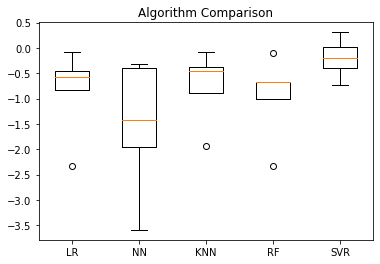

In [26]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()